Fin : 8.0  --> Fout : 8.008


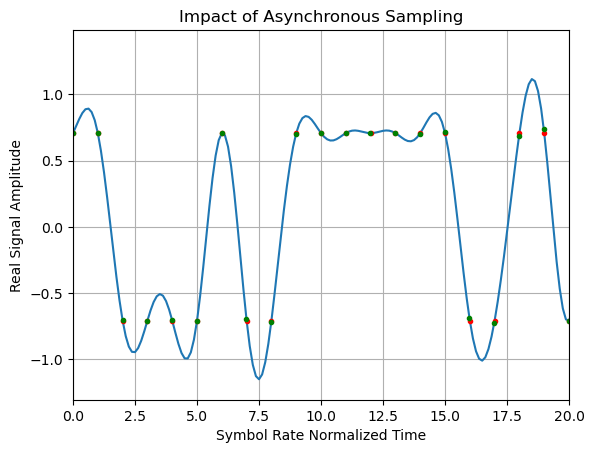

In [13]:
import matplotlib.pyplot as plt
from numpy import arange
from sk_dsp_comm import digitalcom as dc
Ns = 8
Rs = 1.
fsin = Ns*Rs
Tsin = 1 / fsin
N = 200
ts = 1
x, b, data = dc.mpsk_bb(N+12, Ns, 4, 'rc')
x = x[12*Ns:]
xxI = x.real
M = 60
fsout = fsin * 1.001

print("Fin : {0}  --> Fout : {1}".format(fsin, fsout))
Tsout = 1. / fsout
xI = dc.farrow_resample(xxI, fsin, fsin)
tx = arange(0, len(xI)) / fsin
yI = dc.farrow_resample(xxI, fsin, fsout)
ty = arange(0, len(yI)) / fsout
plt.plot(tx - Tsin, xI)
plt.plot(tx[ts::Ns] - Tsin, xI[ts::Ns], 'r.')
plt.plot(ty[ts::Ns] - Tsout, yI[ts::Ns], 'g.')
plt.title(r'Impact of Asynchronous Sampling')
plt.ylabel(r'Real Signal Amplitude')
plt.xlabel(r'Symbol Rate Normalized Time')
plt.xlim([0, 20])
plt.grid()
plt.show()